# Imports

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
# Load The Dataset
x, y = datasets.load_boston(return_X_y=True)
x.shape
df = pd.DataFrame(x)
df.head()

df = pd.DataFrame(y)
df.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Train Data

In [3]:
#Train data
x_train_temp=x[0:400,:]
x_train=np.zeros((x_train_temp.shape[0],x_train_temp.shape[1]+1))
x_train[:,0]=np.ones((x_train_temp.shape[0]))
x_train[:,1:]=x_train_temp
"Type of X_train:", type(x_train), "Shape of X_train:", x_train.shape
y_train=y[0:400]

# Test Data

In [4]:
#Test Data
x_test_temp=x[400:,:]
x_test=np.zeros((x_test_temp.shape[0],x_test_temp.shape[1]+1))
x_test[:,0]=np.ones((x_test_temp.shape[0]))
x_test[:,1:]=x_test_temp
"Type of X_train:", type(x_test), "Shape of X_train:", x_test.shape
y_test=y[400:]

# Scaling

In [5]:
# Scaling the data
scaler=StandardScaler()
scaler.fit(x_train[:,1:])
x_train[:,1:]=scaler.transform(x_train[:,1:])
x_test[:,1:]=scaler.transform(x_test[:,1:])

# Initialization

In [6]:
mae_list = []; mse_list = []; lamda_list = [0,10,1000,10000]; alpha = 0.01; lamda_dict = {}; cost_list = []

# Gradient Descent

In [7]:
for lamda in lamda_list:
    theta = np.random.uniform(0,0, size=x_train.shape[1]) # random theta
    iterations = 1000

    m = x_train.shape[0] #row
    n = x_train.shape[1] #column
    
    costs = []
    theta_arr = [] # arr of theta1

    update = np.zeros(x_train.shape[1])

    for i in range(iterations):
        y_pred = np.dot(x_train, theta) # 0o*xo + 01*x1.....0n*xn 

        error = y_pred - y_train # h(x) - y

        cost = np.sum(error**2)/(2*m)  # (1/2*m)*(h(x)-y)**2
        costs.append(cost)

        for j in range(n):
            update[j] = np.sum(error*x_train.T[j]) # (h(xi) - y)*xi 
        theta[0] = theta[0] - (1/m)*(alpha)*update[0]
        theta[1:] = theta[1:]*(1-(alpha*lamda/m)) - (1/m)*alpha*update[1:]

    # Calculate predictions as Xtest(dot)theta
    predictions =np.dot(x_test, theta)
    # Calculate MAE and MSE
    mae = metrics.mean_absolute_error(y_true = y_test, y_pred = predictions)
    mse = metrics.mean_squared_error(y_true = y_test, y_pred = predictions)
    
    print("lamda : ",lamda)
    print("cost : ",cost)
    print("Mean Absolute Error : ", mae)
    print("Mean Squared Error : ", mse,end="\n\n")

    thetaarr = pd.DataFrame(theta)
    
    cost_list.append(costs)
    lamda_dict[lamda] = [mse,cost]

lamda :  0
cost :  11.259639485809208
Mean Absolute Error :  4.797108879704638
Mean Squared Error :  33.19151296557728

lamda :  10
cost :  11.318911495567333
Mean Absolute Error :  4.67984560647567
Mean Squared Error :  31.667359286602274

lamda :  1000
cost :  21.780577726659548
Mean Absolute Error :  4.337370145619891
Mean Squared Error :  28.03600106140369

lamda :  10000
cost :  36.74991894961047
Mean Absolute Error :  7.555648312430681
Mean Squared Error :  76.22945713670182



# Dict of MAE, Cost for All Lambda

In [8]:
lamda_dict

{0: [33.19151296557728, 11.259639485809208],
 10: [31.667359286602274, 11.318911495567333],
 1000: [28.03600106140369, 21.780577726659548],
 10000: [76.22945713670182, 36.74991894961047]}

# Cost VS Iterations for All Lambda

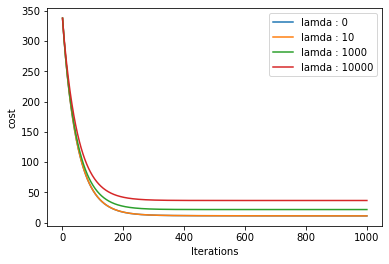

In [9]:
iterations_arr = np.linspace(1,iterations,iterations)
iterations_arr = np.array(iterations_arr)
for costs in cost_list:
    plt.plot(iterations_arr,costs)
plt.ylabel("cost")
plt.xlabel("Iterations")
plt.legend(['lamda : 0','lamda : 10','lamda : 1000','lamda : 10000')
plt.show()